Crime Data:
    Row= parishes
    Column= Month - Year

In [1]:
import pandas as pd


# Read the CSV file into a DataFrame
crime_Data = pd.read_csv('data/Crime Data Month Year.csv')
crime_Data.head()


,Parish,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,Sep-15,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
0,Catahoula,15,13,11.0,18,5,10.0,13.0,27,13.0,...,5.0,8.0,4.0,6.0,7.0,12.0,3.0,9.0,11.0,8.0
1,Claiborne,16,11,17.0,26,22,16.0,22.0,24,NaN,...,5.0,10.0,7.0,3.0,6.0,9.0,11.0,11.0,4.0,4.0
2,Concordia,66,63,51.0,52,50,80.0,68.0,79,55.0,...,23.0,24.0,20.0,39.0,26.0,34.0,6.0,7.0,7.0,NaN
3,DE SOTO,54,44,43.0,75,84,55.0,58.0,71,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,East Baton Rouge,1708,1245,1564.0,1729,1837,1799.0,1917.0,2123,1824.0,...,516.0,478.0,474.0,522.0,518.0,472.0,529.0,510.0,545.0,73.0


School Data:



In [2]:
import os
import pandas as pd

columns = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]

parishes = [
    "Acadia", "Allen", "Ascension", "Assumption", "Avoyelles", "Beauregard", "Bienville", "Bossier",
    "Caddo", "Calcasieu", "Caldwell", "Cameron", "Catahoula", "Claiborne", "Concordia", "DeSoto",
    "East Baton Rouge", "East Carroll", "East Feliciana", "Evangeline", "Franklin", "Grant", "Iberia",
    "Iberville", "Jackson", "Jefferson", "Jefferson Davis", "Lafayette", "Lafourche", "LaSalle",
    "Lincoln", "Livingston", "Madison", "Morehouse", "Natchitoches", "Orleans", "Ouachita",
    "Plaquemines", "Pointe Coupee", "Rapides", "Red River", "Richland", "Sabine", "St. Bernard",
    "St. Charles", "St. Helena", "St. James", "St. John the Baptist", "St. Landry", "St. Martin",
    "St. Mary", "St. Tammany", "Tangipahoa", "Tensas", "Terrebonne", "Union", "Vermilion", "Vernon",
    "Washington", "Webster", "West Baton Rouge", "West Carroll", "West Feliciana", "Winn"
]

folder_path = "data/School Data Year"

# Create empyty DF with column for years and rows as parishes
school_data = pd.DataFrame(index=parishes, columns=columns)

# Sort file names so years are consistent
items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    if os.path.isfile(item_full_path):

        try:
            year = int("".join(filter(str.isdigit, item_name))[:4])
            if year not in school_data.columns:
                print(f"⚠️ {item_name} skipped — year {year} not in template")
            else:
                df = pd.read_excel(item_full_path)
                # Only waNT THE COLUMN NAMED DPS AND THE ROWS 2 AND 64
                schoolfiltered = df.loc[0:63,"DPS"]

                # add the grade number to the appropriate year column
                school_data[year] = schoolfiltered.values

        except Exception as e:
            print(f"Error reading {item_name}: {e}")

school_data.head()

c:\Users\coalc\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\coalc\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,2014,2015,2016,2017,2018,2019,2021,2022,2023,2024
Acadia,89.7,87.0,97.3,90.0,79.5,81.0,81.0,77.1,81.2,80.0
Allen,98.3,98.5,104.2,103.4,85.1,86.6,86.6,84.5,84.8,88.3
Ascension,106.9,107.4,109.3,110.4,91.2,92.3,92.3,92.0,93.7,95.8
Assumption,89.4,91.6,93.3,95.0,78.9,80.5,80.5,78.7,80.6,81.8
Avoyelles,72.9,61.5,73.6,71.5,66.6,71.7,71.7,78.5,77.7,79.1


Home Mortgage Rates:



In [3]:
HomeRatesUnfiltered = pd.read_excel("data/Home Mortgage Rates.xlsx")
HomeRatesUnfiltered["observation_date"] = pd.to_datetime(HomeRatesUnfiltered["observation_date"])

# Resample first (needs datetime index)
HomeRates_Data = (
    HomeRatesUnfiltered
        .set_index("observation_date")
        .resample("M")["MORTGAGE30US"]
        .mean()
)

# Convert end-of-month dates to YYYY-MM
HomeRates_Data.index = HomeRates_Data.index.to_period("M").astype(str)
HomeRates_Data = HomeRates_Data.to_frame().T

HomeRates_Data.head()


C:\Users\coalc\AppData\Local\Temp\ipykernel_20204\413658005.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  HomeRatesUnfiltered


observation_date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
MORTGAGE30US,4.432,4.3025,4.3425,4.3375,4.192,4.1625,4.13,4.115,4.1625,4.036,...,6.8425,6.65,6.725,6.816,6.8175,6.72,6.5875,6.3525,6.254,6.23


Home Values:

In [4]:
HomeValuesUnfilterd = pd.read_csv("data/Home Values Month Year.csv")
HomeValuesUnfilterd["RegionName"] = HomeValuesUnfilterd["RegionName"].str.replace(" Parish", "", regex=False)
HomeValuesUnfilterd = HomeValuesUnfilterd.set_index("RegionName")
HomeValues_Data = HomeValuesUnfilterd.drop(columns=["SizeRank"])

HomeValues_Data.head()





,Jan-00,Feb-00,Mar-00,Apr-00,May-00,Jun-00,Jul-00,Aug-00,Sep-00,Oct-00,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
RegionName,,,,,,,,,,,,,,,,,,,,,
East Baton Rouge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232684.485748,232994.279651,232535.091943,231765.383062,231555.700747,231189.966035,230481.867855,229203.888988,228155.265514,227700.100000
Jefferson,177685.116025,177506.932739,177385.050007,177552.147251,178230.031288,178524.211742,178434.676084,178227.003249,178562.049517,179768.164979,...,252740.518966,251592.557576,251090.808246,250284.419563,250230.508089,251304.382917,253233.975326,256094.149655,258570.139040,261029.195074
Orleans,114457.315138,114463.084020,114609.612186,114925.857799,115379.142598,116112.375793,116788.601812,117497.558926,118159.671062,118945.654202,...,245288.312613,244684.625332,243340.799847,242208.428409,241274.929752,240797.041239,240617.099757,240693.788453,240126.687346,239059.044304
Saint Tammany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,278796.795443,279398.260949,279706.231973,280329.693073,280834.972401,280806.851946,280111.238384,279085.095805,278179.867160,277339.750408
Lafayette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,231842.569211,231809.998417,231165.701590,230510.798849,229994.968306,230106.991656,230185.820386,230211.037006,230373.184769,230968.706349


Median Household Income:

In [5]:
import os
import pandas as pd

def simplify(col):
    if not isinstance(col, str):
        return col
    if col in ["GEO_ID", "NAME", "Geographic Area Name"]:
        return col

    parts = col.split("!!")
    last = parts[-1].strip()
    last = (last.replace("(", "")
                .replace(")", "")
                .replace(",", "")
                .replace("--", "_")
                .replace(" ", "_"))
    return last

folder_path = "data/Median Household Income"
columns = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

MedianHouseIncome_Data = {}

items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    try:
        # Year
        year = int("".join(filter(str.isdigit, item_name))[:4])
        if year not in columns:
            continue

        # Load entire CSV raw
        df_raw = pd.read_csv(item_full_path, header=None)

        # Detect header row → row containing "!!"
        header_row_index = df_raw.apply(lambda row: row.astype(str).str.contains("!!").any(), axis=1).idxmax()

        # Set header
        df_raw.columns = df_raw.iloc[header_row_index]

        # Drop all rows up to header row
        df = df_raw.drop(index=list(range(header_row_index+1)))

        df = df.reset_index(drop=True)

        # Drop GEO_ID column (first column always)
        df = df.drop(columns=df.columns[0])

        # Drop MOE columns
        df = df.drop(columns=df.filter(regex="Margin of Error").columns)

        # Clean NAME column (which is now correctly labeled)
        name_col = df.columns[0]
        df[name_col] = df[name_col].str.replace(", Louisiana", "", regex=False)
        df[name_col] = df[name_col].str.replace(" Parish", "", regex=False)

        # Set index
        df = df.set_index(name_col)

        # Simplify column names
        df.columns = [simplify(col) for col in df.columns]

        # Reindex by parish list
        df = df.reindex(parishes)

        # Store
        MedianHouseIncome_Data[year] = df

    except Exception as e:
        print(f"Error reading {item_name}: {e}")

print(MedianHouseIncome_Data)


{2014:                      Households Households White  White  \
Geographic Area Name                                      
Acadia                    22788      37684  81.4  42665   
Allen                      8108      39440  81.5  41630   
Ascension                 39447      70207  76.0  74878   
Assumption                 8726      47961  72.2  55934   
Avoyelles                 15107      33781  74.5  38227   
...                         ...        ...   ...    ...   
Webster                   15831      35292  64.9  45805   
West Baton Rouge           9030      49202  62.9  65161   
West Carroll               4216      31843  87.4  35620   
West Feliciana             3976      53967  61.6  83623   
Winn                       5371      32608  72.4  40655   

                     Black_or_African_American Black_or_African_American  \
Geographic Area Name                                                       
Acadia                                    17.0                     21150 

## LSTM Model for 10-Year Home Value Prediction

**Inflation Approach**: Working in nominal terms - the LSTM learns historical patterns including embedded inflation effects. Predictions will be in approximate "future dollars" reflecting both real appreciation and inflation trends from training data.


In [6]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# --- 1. Prepare Data: Merge all features into a single DataFrame per parish ---

# Get monthly columns from HomeValues_Data (format: "Mon-YY" like "Jan-00")
date_cols = [c for c in HomeValues_Data.columns if '-' in str(c)]
print(f"Number of date columns: {len(date_cols)}")
print(f"Sample dates: {date_cols[:5]} ... {date_cols[-3:]}")

# Helper to extract year from "Mon-YY" format
def parse_year(date_str):
    try:
        yy = int(str(date_str).split('-')[1])
        return 2000 + yy if yy < 50 else 1900 + yy
    except:
        return None

# Get average mortgage rate per year for simpler matching
mortgage_by_year = {}
for col in HomeRates_Data.columns:
    try:
        yr = int(str(col).split('-')[0])
        if yr not in mortgage_by_year:
            mortgage_by_year[yr] = []
        mortgage_by_year[yr].append(HomeRates_Data[col].values[0])
    except:
        pass
mortgage_by_year = {yr: np.mean(vals) for yr, vals in mortgage_by_year.items()}
print(f"Mortgage years available: {sorted(mortgage_by_year.keys())[:5]}...{sorted(mortgage_by_year.keys())[-3:]}")

# Build feature matrix for each parish  
def build_parish_data(parish):
    df = pd.DataFrame(index=date_cols)
    
    # Home Values (target) - required
    if parish in HomeValues_Data.index:
        df['home_value'] = pd.to_numeric(HomeValues_Data.loc[parish, date_cols], errors='coerce')
    else:
        return pd.DataFrame()  # Skip if no home values
    
    # Year column for mapping
    df['year'] = [parse_year(c) for c in df.index]
    
    # Mortgage Rates by year
    df['mortgage_rate'] = df['year'].map(mortgage_by_year)
    
    # School Rating (yearly)
    if parish in school_data.index:
        school_map = {int(k): v for k, v in school_data.loc[parish].to_dict().items() if pd.notna(v)}
        df['school_rating'] = df['year'].map(school_map)
    else:
        df['school_rating'] = 50  # Default
    
    # Median Income (yearly)
    income_map = {}
    for yr in MedianHouseIncome_Data:
        if parish in MedianHouseIncome_Data[yr].index:
            val = MedianHouseIncome_Data[yr].loc[parish, 'Households']
            try:
                income_map[yr] = float(str(val).replace(',', ''))
            except:
                pass
    df['median_income'] = df['year'].map(income_map)
    
    # Crime (if available)
    df['crime'] = 0
    if parish in crime_Data.columns:
        crime_col = crime_Data.set_index(crime_Data.columns[0])[parish]
        df['crime'] = df.index.map(crime_col.to_dict()).fillna(0)
    
    # Drop year, fill missing values, keep rows with valid home_value
    df = df.drop(columns=['year'])
    df = df.ffill().bfill()
    df = df[df['home_value'].notna()]  # Only require home_value
    
    # Fill any remaining NaN with column means or defaults
    for col in df.columns:
        if df[col].isna().any():
            df[col] = df[col].fillna(df[col].mean() if df[col].notna().any() else 0)
    
    return df

# Combine all parishes
parish_dfs = {}
for p in HomeValues_Data.index:
    pdf = build_parish_data(p)
    if len(pdf) > 0:
        parish_dfs[p] = pdf

print(f"Parishes with valid data: {len(parish_dfs)}")

if len(parish_dfs) == 0:
    # Debug: show what's in the first parish
    test_parish = HomeValues_Data.index[0]
    print(f"\nDebugging {test_parish}:")
    print(f"Home values sample: {HomeValues_Data.loc[test_parish, date_cols[:3]]}")
    raise ValueError("No parishes have valid data!")

all_data = pd.concat(parish_dfs, names=['parish', 'date'])
all_data = all_data.reset_index()
print(f"Dataset shape: {all_data.shape}")
all_data.head()


Number of date columns: 310
Sample dates: ['Jan-00', 'Feb-00', 'Mar-00', 'Apr-00', 'May-00'] ... ['Aug-25', 'Sep-25', 'Oct-25']
Mortgage years available: [2014, 2015, 2016, 2017, 2018]...[2023, 2024, 2025]
Parishes with valid data: 64
Dataset shape: (19840, 7)


,parish,date,home_value,mortgage_rate,school_rating,median_income,crime
0,East Baton Rouge,Jan-00,132002.604505,4.172833,81.3,0.0,0
1,East Baton Rouge,Feb-00,132002.604505,4.172833,81.3,0.0,0
2,East Baton Rouge,Mar-00,132002.604505,4.172833,81.3,0.0,0
3,East Baton Rouge,Apr-00,132002.604505,4.172833,81.3,0.0,0
4,East Baton Rouge,May-00,132002.604505,4.172833,81.3,0.0,0


In [7]:
# --- 2. Create Sequences for LSTM ---

SEQ_LEN = 12  # 1 year of monthly data as input (reduced for more samples)
PRED_HORIZON = 120  # 10 years ahead (120 months)

# Debug: Check data
print(f"all_data shape: {all_data.shape}")
print(f"Parishes: {all_data['parish'].nunique()}")
print(f"Sample data:\n{all_data.head()}")

feature_cols = [c for c in all_data.columns if c not in ['parish', 'date']]
print(f"\nFeature columns: {feature_cols}")

# Fit scaler on all numeric data first
all_numeric = all_data[feature_cols].values.astype(float)
scaler = MinMaxScaler()
scaler.fit(all_numeric)

def create_sequences(parish_df, seq_len=SEQ_LEN):
    data = parish_df[feature_cols].values.astype(float)
    data_scaled = scaler.transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - seq_len):
        X.append(data_scaled[i:i+seq_len])
        y.append(data_scaled[i+seq_len, 0])  # home_value is column 0
    return np.array(X), np.array(y)

# Build sequences for all parishes
X_all, y_all = [], []
parishes_used = 0
for parish in all_data['parish'].unique():
    pdf = all_data[all_data['parish'] == parish].reset_index(drop=True)
    if len(pdf) > SEQ_LEN + 1:
        X, y = create_sequences(pdf)
        if len(X) > 0:
            X_all.append(X)
            y_all.append(y)
            parishes_used += 1

print(f"\nParishes with enough data: {parishes_used}")

if len(X_all) == 0:
    raise ValueError("No sequences created! Check data preparation.")

X_all = np.vstack(X_all)
y_all = np.hstack(y_all)

# Train/test split (80/20)
split = int(0.8 * len(X_all))
X_train, X_test = X_all[:split], X_all[split:]
y_train, y_test = y_all[:split], y_all[split:]

# Convert to PyTorch tensors
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).unsqueeze(1)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test).unsqueeze(1)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Features: {feature_cols}")


all_data shape: (19840, 7)
Parishes: 64
Sample data:
             parish    date     home_value  mortgage_rate  school_rating  \
0  East Baton Rouge  Jan-00  132002.604505       4.172833           81.3   
1  East Baton Rouge  Feb-00  132002.604505       4.172833           81.3   
2  East Baton Rouge  Mar-00  132002.604505       4.172833           81.3   
3  East Baton Rouge  Apr-00  132002.604505       4.172833           81.3   
4  East Baton Rouge  May-00  132002.604505       4.172833           81.3   

   median_income  crime  
0            0.0      0  
1            0.0      0  
2            0.0      0  
3            0.0      0  
4            0.0      0  

Feature columns: ['home_value', 'mortgage_rate', 'school_rating', 'median_income', 'crime']

Parishes with enough data: 64
Training samples: 15257, Test samples: 3815
Features: ['home_value', 'mortgage_rate', 'school_rating', 'median_income', 'crime']


In [8]:
# --- 3. Define LSTM Model ---

class HomeLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # Last timestep output

model = HomeLSTM(input_size=len(feature_cols))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)


HomeLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [9]:
# --- 4. Train the Model ---

EPOCHS = 100

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_t)
    loss = criterion(output, y_train_t)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(X_test_t)
            test_loss = criterion(test_pred, y_test_t)
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {loss.item():.6f} | Test Loss: {test_loss.item():.6f}")


Epoch 20/100 | Train Loss: 0.017263 | Test Loss: 0.027077
Epoch 40/100 | Train Loss: 0.015592 | Test Loss: 0.026458
Epoch 60/100 | Train Loss: 0.006993 | Test Loss: 0.011160
Epoch 80/100 | Train Loss: 0.000892 | Test Loss: 0.001398
Epoch 100/100 | Train Loss: 0.000557 | Test Loss: 0.000542


In [10]:
# --- 5. Predict Home Value in 10 Years ---

def predict_10_years(parish, current_value, school_rating, crime_rate, median_income, mortgage_rate):
    """
    Predict home value 10 years from now using recursive forecasting.
    """
    model.eval()
    
    # Create initial sequence using provided inputs (normalized)
    features = np.array([[current_value, mortgage_rate, school_rating, median_income, crime_rate]])
    features_scaled = scaler.transform(features)
    
    # Start with the last 24 months of data for this parish as base, override with inputs
    parish_data = all_data[all_data['parish'] == parish][feature_cols].tail(SEQ_LEN).values
    if len(parish_data) < SEQ_LEN:
        parish_data = np.tile(features, (SEQ_LEN, 1))
    
    parish_scaled = scaler.transform(parish_data)
    sequence = parish_scaled.copy()
    
    # Recursive prediction: predict one step, roll forward, repeat 120 times
    predictions = []
    for _ in range(PRED_HORIZON):
        with torch.no_grad():
            seq_tensor = torch.FloatTensor(sequence).unsqueeze(0)
            pred = model(seq_tensor).item()
            predictions.append(pred)
            
            # Roll sequence forward with predicted value
            new_row = sequence[-1].copy()
            new_row[0] = pred  # Update home value
            sequence = np.vstack([sequence[1:], new_row])
    
    # Inverse transform final prediction
    final_scaled = np.zeros((1, len(feature_cols)))
    final_scaled[0, 0] = predictions[-1]
    final_value = scaler.inverse_transform(final_scaled)[0, 0]
    
    return final_value, predictions

# Example prediction
example_parish = HomeValues_Data.index[0]
current_val = HomeValues_Data.iloc[0, -1]  # Most recent value

predicted_value, monthly_preds = predict_10_years(
    parish=example_parish,
    current_value=current_val,
    school_rating=75,
    crime_rate=50,
    median_income=50000,
    mortgage_rate=7.0
)

print(f"\n{'='*50}")
print(f"Parish: {example_parish}")
print(f"Current Home Value: ${current_val:,.0f}")
print(f"Predicted Value in 10 Years: ${predicted_value:,.0f}")
print(f"Projected Growth: {((predicted_value/current_val)-1)*100:.1f}%")
print(f"{'='*50}")



Parish: East Baton Rouge
Current Home Value: $227,700
Predicted Value in 10 Years: $477,124
Projected Growth: 109.5%


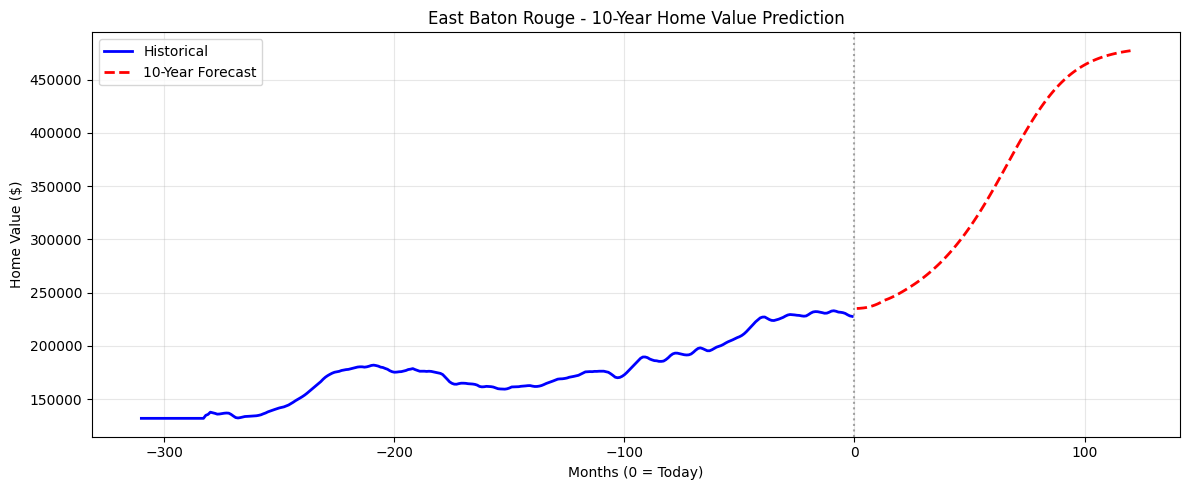

In [11]:
# --- 6. Visualize 10-Year Projection ---
import matplotlib.pyplot as plt

# Get historical data for the example parish
hist = all_data[all_data['parish'] == example_parish]['home_value'].values

# Create projection timeline
months_future = range(1, PRED_HORIZON + 1)
pred_values = [scaler.inverse_transform(np.array([[p] + [0]*(len(feature_cols)-1)]))[0, 0] for p in monthly_preds]

plt.figure(figsize=(12, 5))
plt.plot(range(-len(hist), 0), hist, 'b-', label='Historical', linewidth=2)
plt.plot(months_future, pred_values, 'r--', label='10-Year Forecast', linewidth=2)
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.7)
plt.xlabel('Months (0 = Today)')
plt.ylabel('Home Value ($)')
plt.title(f'{example_parish} - 10-Year Home Value Prediction')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
